In [1]:
#set up variable
import pandas as pd 
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

In [2]:
#URL's for sales data
manhattansalesurl = "http://www1.nyc.gov/assets/finance/downloads/pdf/lien_sale/2017/10_day/manhattan_10_day.xlsx"
bronxsalesurl = "http://www1.nyc.gov/assets/finance/downloads/pdf/lien_sale/2017/10_day/bronx_10_day.xlsx"
brooklynsalesurl = "http://www1.nyc.gov/assets/finance/downloads/pdf/lien_sale/2017/10_day/brooklyn_10_day.xlsx"
queenssalesurl = "http://www1.nyc.gov/assets/finance/downloads/pdf/lien_sale/2017/10_day/queens_10_day.xlsx"
statenislandsalesurl = "http://www1.nyc.gov/assets/finance/downloads/pdf/lien_sale/2017/10_day/statenisland_10_day.xlsx"

In [3]:
#create dataframes
manhattansalesdf = pd.read_excel(manhattansalesurl)
bronxsalesdf = pd.read_excel(bronxsalesurl)
brooklynsalesdf = pd.read_excel(brooklynsalesurl)
queenssalesdf = pd.read_excel(queenssalesurl)
statenislandsalesdf = pd.read_excel(statenislandsalesurl)

In [4]:
#merge dataframes
allboroughs = pd.concat([queenssalesdf,brooklynsalesdf, bronxsalesdf, manhattansalesdf, statenislandsalesdf], ignore_index=True)

In [5]:
df = allboroughs['Council District'].value_counts()

In [6]:
Councildistricts = "https://raw.githubusercontent.com/tax-equity-now/tenny-property-tax-public/master/data/Effective_Tax_Rate_by_Council_District.csv"

In [7]:
Councildf = pd.read_csv(Councildistricts)

In [8]:
Councildf = Councildf.rename(columns={'Council District': 'CouncilDistrict'})

In [9]:
Councildf = Councildf[Councildf.CouncilDistrict != 'Total Citywide']

In [10]:
Councildf = Councildf[pd.notnull(Councildf['CouncilDistrict'])]

In [11]:
Councildf["CouncilDistrict"] = Councildf["CouncilDistrict"].astype(int)

In [12]:
data = pd.countbydistrict = (allboroughs['Council District'])

In [13]:
df3 = pd.DataFrame(data = df)

In [14]:
df3['index1'] = df3.index

In [15]:
df3 = df3.rename(columns={'Council District': 'Total Len', 'index1': 'CouncilDistrict'})

In [16]:
mergeddf = pd.merge(df3, Councildf, on='CouncilDistrict')

In [17]:
mergeddf.head(2)

,Total Len,CouncilDistrict,# of Properties,Effective Tax Rate w/out Exemption Based on Assessment Roll,Effective Tax Rate w/out Exemption Based on Assessment Roll 2,Compared to City Council District 7 @ .34% Based on Assessment Roll,Rank Based on Assessment Roll,# of Sales,Effective Tax Rate w/out Exemption Based on Sales Price,Effective Tax Rate w/out Exemption Based on Sales Price 2,% Higher than City Council District 33 @.29% Based on Sales Price,Rank Based on Sales Price,% of Properties that Sold
0,652,37.0,"13,159",0.006902,0.690161,203%,17.0,756,0.006406,0.640632,221%,16.0,5.7%
1,603,27.0,"32,255",0.009948,0.994802,292%,44.0,"1,241",0.011276,1.127554,388%,47.0,3.8%


In [18]:
#convert to integers
#mergeddf["Total Len"] = mergeddf["Total Len"].astype(int)
#mergeddf["Total Len"] = mergeddf["Total Len"].astype(int)

In [34]:
#export to excel 
mergeddf.to_excel('AllData.xls')

In [20]:
y = mergeddf["Total Len"]
x = mergeddf["Effective Tax Rate w/out Exemption Based on Sales Price 2"]

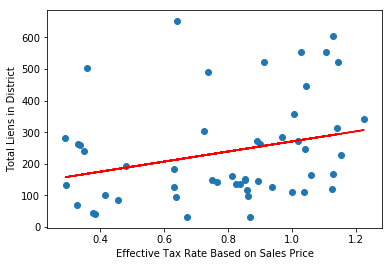

In [21]:
fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')

plt.xlabel('Effective Tax Rate Based on Sales Price')
plt.ylabel('Total Liens in District')

ax.scatter(x, y)

In [22]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [23]:
"r-squared:", r_value**2

('r-squared:', 0.074680608246766825)

In [24]:
y = mergeddf["Total Len"]
x = mergeddf["Effective Tax Rate w/out Exemption Based on Assessment Roll 2"]

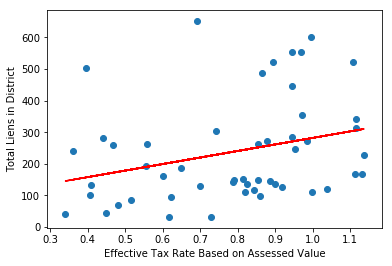

In [25]:
fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')

plt.xlabel('Effective Tax Rate Based on Assessed Value')
plt.ylabel('Total Liens in District')

ax.scatter(x, y)

In [26]:
"r-squared:", r_value**2

('r-squared:', 0.074680608246766825)

In [27]:
#merged2 = merged2[merged2.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [28]:
#remove standard deviation
merged2 = pd.concat([mergeddf["Total Len"], mergeddf["Effective Tax Rate w/out Exemption Based on Assessment Roll 2"]], axis=1, keys=['Total Len', 'Effective Tax Rate w/out Exemption Based on Assessment Roll'])

In [29]:
y = merged2["Total Len"]
x = merged2["Effective Tax Rate w/out Exemption Based on Assessment Roll"]

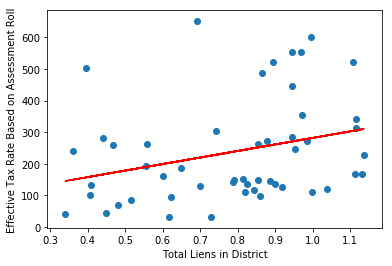

In [30]:
#Plot with standard deviations removed
fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
plt.xlabel('Total Liens in District')
plt.ylabel('Effective Tax Rate Based on Assessment Roll')
ax.scatter(x, y)

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [32]:
"r-squared:", r_value**2

('r-squared:', 0.08583131255560425)